In [1]:
using ApproxFun, ApproxFunRational, AKNS, LinearAlgebra, SpecialFunctions, Plots,
    SparseArrays, AbstractIterativeSolvers, LaTeXStrings, Printf

In [2]:
A = 1.65; γ = 0.1;
q = x -> -1im*A*sech(x)*exp(-1im*γ*A*log(cosh(x)))
r = x -> -conj(q(x))

#3 (generic function with 1 method)

## Check reflection

In [3]:
w = z -> -1im*z - A*γ*1im/2 + 0.5
T = sqrt(γ^2/4 -1 |> Complex)
wp = -1im*A*(T + γ/2)
wm = 1im*A*(T-γ/2)
asech = z -> (gamma(w(z))*gamma(w(z)-wm-wp))/(gamma(w(z)-wp)*gamma(w(z)-wm))
bsech = z -> 1im*1/A*2^(-1im*A*γ)*(gamma(w(z))*gamma(1-w(z)+wp+wm))/(gamma(wp)*gamma(wm))
ρsech = z -> bsech(z)/asech(z)
logasech = z -> loggamma(w(z)) + loggamma(w(z)-wm-wp) - loggamma(w(z)-wp) - loggamma(w(z)-wm)

#13 (generic function with 1 method)

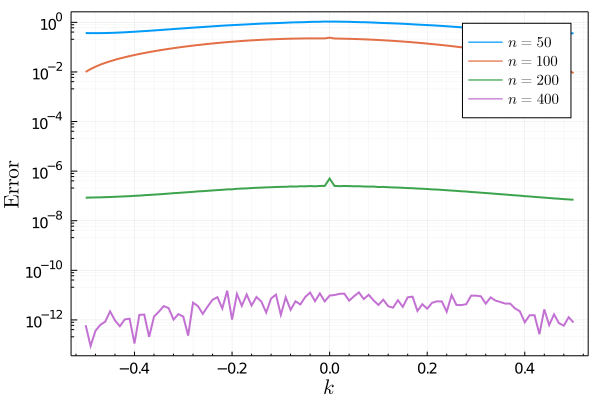

In [6]:
x = -.5:.01:.5
n = 50
S = AKNS.AKNSscattering(q,r,n,n+101,12.0);
y = map(x -> abs(S(x)[1,1]-asech(x)),x)
str = @sprintf("n = %i",n)
p = plot(x,y,lw=2,yaxis=:log,framestyle=:box,minorgrid=:true,label=latexstring(str),tickfont = font(10),legendfontsize = 10,guidefontsize=14)

for n in [100,200,400]
    S = AKNS.AKNSscattering(q,r,n,n+101,12.0);
    y = map(x -> abs(S(x)[1,1]-asech(x)),x)
    str = @sprintf("n = %i",n)
    plot!(x,y,lw=2,yaxis=:log,framestyle=:box,label = latexstring(str),xlabel=L"k",ylabel=L"\mathrm{Error}")
end
display(p)

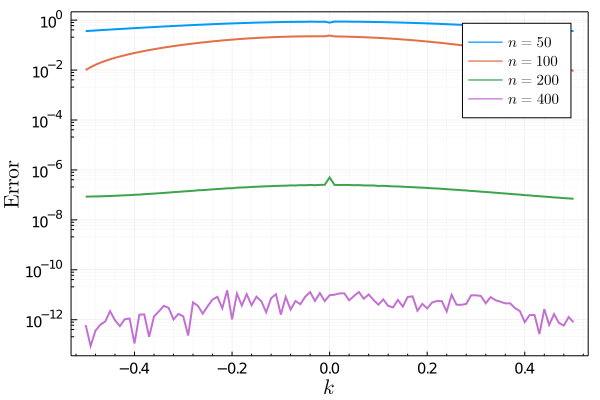

In [7]:
x = -.5:.01:.5
n = 50
S = AKNS.AKNSscattering(q,r,n,n+101,12.0);
y = map(x -> abs(S(x)[2,1]-bsech(x)),x)
str = @sprintf("n = %i",n)
p = plot(x,y,lw=2,yaxis=:log,framestyle=:box,minorgrid=:true,label=latexstring(str),tickfont = font(10),legendfontsize = 10,guidefontsize=14)

for n in [100,200,400]
    S = AKNS.AKNSscattering(q,r,n,n+101,12.0);
    y = map(x -> abs(S(x)[1,1]-asech(x)),x)
    str = @sprintf("n = %i",n)
    plot!(x,y,lw=2,yaxis=:log,framestyle=:box,label = latexstring(str),xlabel=L"k",ylabel=L"\mathrm{Error}")
end
display(p)

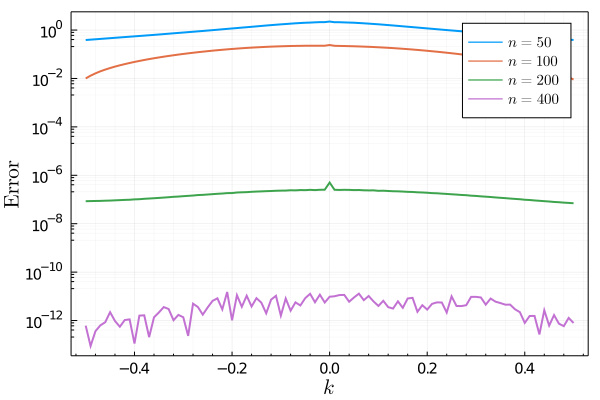

In [8]:
x = -.5:.01:.5
n = 50
S = AKNS.AKNSscattering(q,r,n,n+101,12.0);
y = map(x -> abs(S(x)[2,1]/S(x)[1,1]-ρsech(x)),x)
str = @sprintf("n = %i",n)
p = plot(x,y,lw=2,yaxis=:log,framestyle=:box,minorgrid=:true,label=latexstring(str),tickfont = font(10),legendfontsize = 10,guidefontsize=14)

for n in [100,200,400]
    S = AKNS.AKNSscattering(q,r,n,n+101,12.0);
    y = map(x -> abs(S(x)[1,1]-asech(x)),x)
    str = @sprintf("n = %i",n)
    plot!(x,y,lw=2,yaxis=:log,framestyle=:box,label = latexstring(str),xlabel=L"k",ylabel=L"\mathrm{Error}")
end
display(p)

## Set up Funs to compute all data.

In [26]:
q = x -> exp(-x^2)
r = x -> -2*exp(-x^2+1im*x)
S = AKNS.AKNSscattering(q,r,200,301,8.0);

In [35]:
sp = OscLaurent(0.0,1.0)
pts = Fun(zai(q),sp,150) |> points
Svals = map(x->S(x),pts)
sp2 = OscLaurent(0.0,0.2)
pts2 = Fun(zai(q),sp2,150) |> points
Svals2 = map(x->S(x),pts2)

aFun = Fun(sp2,transform(sp2,[i[1,1] for i in Svals2]))
AFun = Fun(sp2,transform(sp2,[i[2,2] for i in Svals2]))
BFun = Fun(sp,transform(sp,[i[1,2] for i in Svals]))
bFun = Fun(sp,transform(sp,[i[2,1] for i in Svals]));

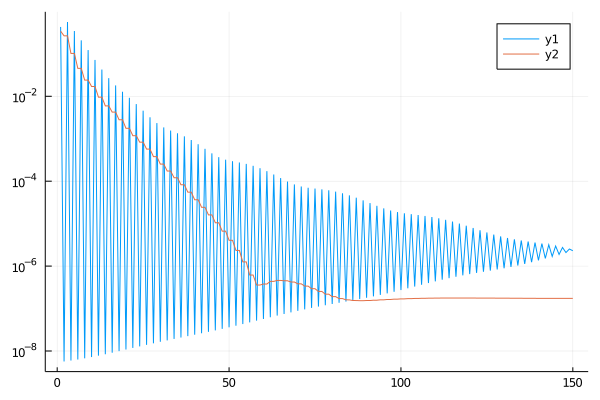

In [36]:
plot(abs.(aFun.coefficients), yaxis = :log)
plot!(abs.(bFun.coefficients), yaxis = :log)

In [19]:
Sλ = AKNS.AKNSscattering(q,r,300,800,12.0)
eigs = AKNS.λ(Sλ)

daFun = aFun'
CaFun = x -> Cauchy(+1,x)*aFun
dCaFun = x -> Cauchy(+1,x)*daFun

dAFun = AFun'
CAFun = x -> Cauchy(-1,x)*AFun
dCAFun = x -> Cauchy(-1,x)*dAFun;

In [37]:
eigs

2-element Vector{ComplexF64}:
 0.2500000000000042 + 0.5017003899378993im
 0.2500000000000043 - 0.5017003899378989im

In [38]:
zp = eigs[1]

0.2500000000000042 + 0.5017003899378993im

In [45]:
Sl = AKNS.AKNSscattering(q,r,400,501,12.0);
Φl = AKNS.Jost(Sl,zp)
Sr = AKNS.AKNSscattering(x -> -q(-x), x -> -r(-x),300,311,18.0);
Φr = AKNS.Jost(Sr,-zp)
Jl = hcat(Φl[1](0.0), Φl[2](0.0)) + I
Jr = hcat(Φr[1](0.0), Φr[2](0.0)) + I
bj = Jl[2,1]/Jr[2,2]
#bj = S(zp)[2,1]
cp = bj/dCaFun(zp)
dp = -1/(bj*dCaFun(zp))
display(dp)
cp

0.20492932104094236 + 0.7999413232231665im

0.4099268193608175 - 1.600194681694139im

In [40]:
zm = eigs[2]

0.2500000000000043 - 0.5017003899378989im

In [44]:
Sl = AKNS.AKNSscattering(q,r,400,501,12.0);
Φl = AKNS.Jost(Sl,zm)
Sr = AKNS.AKNSscattering(x -> -q(-x), x -> -r(-x),300,311,18.0);
Φr = AKNS.Jost(Sr,-zm)
Jl = hcat(Φl[1](0.0), Φl[2](0.0)) + I
Jr = hcat(Φr[1](0.0), Φr[2](0.0)) + I
bj = Jl[1,2]/Jr[1,1]
#bj = S(zm)[1,2]
cm = bj/dCAFun(zm)
display(cm)
dm = -1/(bj*dCAFun(zm))

0.2050973446516125 - 0.8000882870567139im

0.41010265206992 + 1.599804695629173im

## Use explicit reflection (2 soliton)

In [46]:
A = 1.65; γ = 0.1;
w = z -> -1im*z - A*γ*1im/2 + 0.5
T = sqrt(γ^2/4 -1 |> Complex)
wp = -1im*A*(T + γ/2)
wm = 1im*A*(T-γ/2)

q = x -> -1im*A*sech(x)*exp(-1im*γ*A*log(cosh(x)))
r = x -> -conj(q(x))

#193 (generic function with 1 method)

In [47]:
x = 1.0
logasech = z -> loggamma(w(z)) + loggamma(w(z)-wm-wp) - loggamma(w(z)-wp) - loggamma(w(z)-wm)
logbsech = z -> loggamma(w(z)) + loggamma(1-w(z)+wp+wm) - loggamma(wp) - loggamma(wm)
ρsechexplog = z -> 1im*1/A*2^(-1im*γ*A)*exp(logbsech(z) - logasech(z))
γsechexplog = z -> -conj(1im*1/A*2^(-1im*γ*A)*exp(logbsech(z) - conj(logasech(z))))
bsechexplog = z -> 1im*1/A*2^(-1im*γ*A)*exp(logbsech(z))
#ρ1 = Fun(OscLaurent(2x,sp.domain.L),transform(OscLaurent(2x,sp.domain.L),[i[2,1]/i[1,1] for i in Svals]))
#ρ2 = Fun(OscLaurent(-2x,sp.domain.L),transform(OscLaurent(-2x,sp.domain.L),[i[1,2]/i[2,2] for i in Svals]));
ρ1 = Fun(ρsechexplog,OscLaurent(2x,1.0),300)
ρ2 = Fun(x -> -conj(ρsechexplog(x)) ,OscLaurent(-2x,1.0),300)
aFun = Fun(zai(x -> exp(logasech(x))-1),OscLaurent(0.0,.2),300)
AFun = Fun(zai(x -> conj(exp(logasech(x)))-1),OscLaurent(0.0,.2),300)
daFun = aFun'
CaFun = x -> 1 + Cauchy(+1,x)*aFun
dCaFun = x -> Cauchy(+1,x)*daFun
dAFun = AFun'
CAFun = x -> 1 + Cauchy(-1,x)*AFun
dCAFun = x -> Cauchy(-1,x)*dAFun

#217 (generic function with 1 method)

In [48]:
Sλ = AKNS.AKNSscattering(q,r,300,800,12.0)
eigs = AKNS.λ(Sλ)
eigsp = eigs[imag(eigs) .> 0]
eigsp |> display
eigsm = eigs[imag(eigs) .< 0]

2-element Vector{ComplexF64}:
 -1.935943057492951e-15 + 1.147936209323644im
  3.811721218263702e-15 + 0.1479362093236563im

2-element Vector{ComplexF64}:
 -5.78073086740717e-16 - 1.1479362093236434im
 1.251612072450241e-15 - 0.1479362093236558im

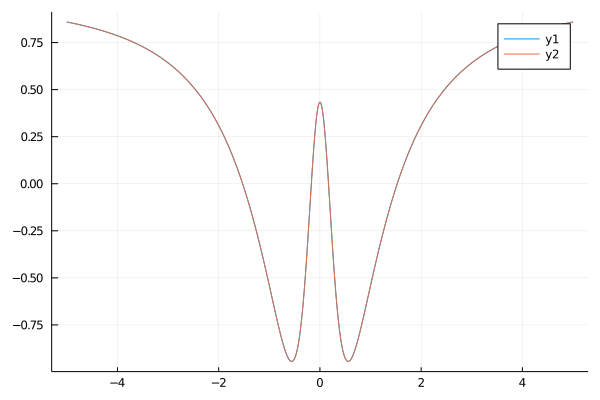

In [50]:
aFun = Fun(zai(x -> exp(logasech(x))-1),OscLaurent(0.0,.2),300)
k = -5:.01:5
plot(k, map(x -> exp(logasech(x)),k) |> real)
plot!(k, map(x -> aFun(x) + 1,k) |> real)

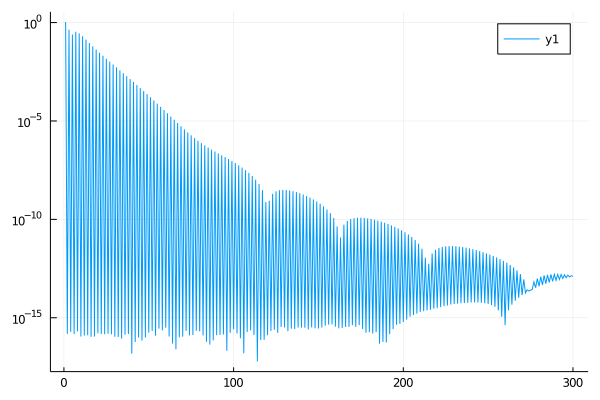

In [51]:
plot(abs.(aFun.coefficients),yaxis = :log)

In [52]:
for i = 1:2
    eigsp = eigsp - map(CaFun,eigsp)./map(dCaFun,eigsp)
    eigsm = eigsm - map(CAFun,eigsm)./map(dCAFun,eigsm)
end

In [53]:
eigsp |> display
eigsm |> display

2-element Vector{ComplexF64}:
  7.915371918758762e-16 + 1.1479362093236485im
 -6.828172520838559e-17 + 0.1479362093236495im

2-element Vector{ComplexF64}:
  8.074339114843735e-16 - 1.1479362093236487im
 -6.727953839265496e-17 - 0.1479362093236495im

In [54]:
dp = map( x -> 1/(bsechexplog(x)*dCaFun(x)), eigsp)
cp = map( x -> bsechexplog(x)/dCaFun(x), eigsp)
cp |> display
cm = -conj(cp)
dm = -conj(dp)

2-element Vector{ComplexF64}:
 3.3119197670509317 - 0.2134114710339604im
 0.6057342337298718 + 0.11583110793881116im

2-element Vector{ComplexF64}:
  3.311919767050943 - 0.21341147103396646im
 0.6057342337298695 + 0.11583110793881im

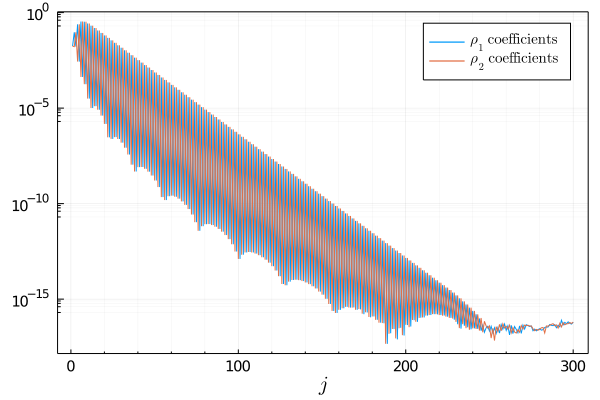

In [55]:
p = plot(abs.(ρ1.coefficients), yaxis = :log,framestyle=:box,minorgrid=:true,label=L"\rho_1~\mathrm{coefficients}",tickfont = font(10),legendfontsize = 10,guidefontsize=14)
plot!(abs.(ρ2.coefficients), yaxis = :log, label=L"\rho_2~\mathrm{coefficients}", xlabel = L"j")

In [56]:
𝓒⁺ = Cauchy(+1)
𝓒⁻ = Cauchy(-1)
u = x -> discreteRHP(eigsp,eigsm,(cp).*exp.(2im*eigsp*x),(cm).*exp.(-2im*eigsm*x))
v = x -> discreteRHP(eigsp,eigsm,(dp).*exp.(-2im*eigsp*x),(dm).*exp.(2im*eigsm*x))

function AKNS_inv(x)
    D = u(x)
    da = Fun(x -> D(x)[1,1],OscLaurent(0.0),200)
    db = Fun(x -> D(x)[1,2],OscLaurent(0.0),200)
    dc = Fun(x -> D(x)[2,1],OscLaurent(0.0),200)
    dd = Fun(x -> D(x)[2,2],OscLaurent(0.0),200)
    ## should fix this for non-explicit reflection
    ρ1 = Fun(ρsechexplog,OscLaurent(2x,1.0),300)
    ρ2 = Fun(x -> -conj(ρsechexplog(x)) ,OscLaurent(-2x,1.0),300)
    
    J1 = map(SumFun,[-db*ρ1, da*ρ2])
    J2 = map(SumFun,[-dd*ρ1, dc*ρ2])
    
    
    
    function applyDinv(x)
        u = copy(x)
        u[1] = dd*x[1] - dc*x[2]
        u[2] = -db*x[1] + da*x[2]
        return u
    end

    function applyD(x)
        u = copy(x)
        u[1] = da*x[1] + dc*x[2]
        u[2] = db*x[1] + dd*x[2]
        return u
    end

    function Sop(x)
        out = copy(x)
        outp = 𝓒⁺*out
        outm = 𝓒⁻*out
        return out + applyDinv([-ρ1*(db*outp[1] + dd*outp[2]), ρ2*(da*outm[1] + dc*outm[2])])
    end
    
    tol = 1e-13
    simp(f) = chop(combine!(chop(f,tol/10000)),tol/10000)
    out1 = GMRES(Sop,J1 |> applyDinv,⋅,tol,10,x -> simp(x))
end

function AKNS_inv2(x)
    D = v(x)
    da = Fun(x -> D(x)[1,1],OscLaurent(0.0),200)
    db = Fun(x -> D(x)[1,2],OscLaurent(0.0),200)
    dc = Fun(x -> D(x)[2,1],OscLaurent(0.0),200)
    dd = Fun(x -> D(x)[2,2],OscLaurent(0.0),200)
    ## should fix this for non-explicit reflection
    ρ1 = Fun(γsechexplog,OscLaurent(-2x,1.0),300)
    ρ2 = Fun(x -> -conj(γsechexplog(x)) ,OscLaurent(2x,1.0),300)
    
    J1 = map(SumFun,[-db*ρ1, da*ρ2])
    J2 = map(SumFun,[-dd*ρ1, dc*ρ2])
    
    
    
    function applyDinv(x)
        u = copy(x)
        u[1] = dd*x[1] - dc*x[2]
        u[2] = -db*x[1] + da*x[2]
        return u
    end

    function applyD(x)
        u = copy(x)
        u[1] = da*x[1] + dc*x[2]
        u[2] = db*x[1] + dd*x[2]
        return u
    end

    function Sop(x)
        out = copy(x)
        outp = 𝓒⁺*out
        outm = 𝓒⁻*out
        return out + applyDinv([-ρ1*(db*outp[1] + dd*outp[2]), ρ2*(da*outm[1] + dc*outm[2])])
    end
    
    tol = 1e-13
    simp(f) = chop(combine!(chop(f,tol/10000)),tol/10000)
    out1 = GMRES(Sop,J1 |> applyDinv,⋅,tol,10,x -> simp(x))
end

AKNS_inv2 (generic function with 1 method)

In [57]:
xs = -3.0:.1:3
x = xs[1]
out = x > 0.0 ? AKNS_inv(x)[3][2:2:end] : AKNS_inv2(x)[3][2:2:end] 
p = scatter(x*ones(length(out)),out,yaxis=:log,markercolor=:black,framestyle=:box,legend=false,ylabel=L"\mathrm{GMRES~Residual}",xlabel=L"x", minorgrid = true, tickfont = font(10),legendfontsize = 10,guidefontsize=14)
for x in xs[2:end]
    println(x)
       out = x > 0.0 ? AKNS_inv(x)[3][2:2:end] : AKNS_inv2(x)[3][2:2:end] 
    scatter!(x*ones(length(out)),out,yaxis=:log,markercolor=:black,framestyle=:box,legend=false,ylabel=L"\mathrm{GMRES~Residual}",xlabel=L"x", minorgrid = true, tickfont = font(10),legendfontsize = 10,guidefontsize=14)
end

iteration = 2, residual = 0.1411832622773287
iteration = 3, residual = 0.007749057365583558
iteration = 4, residual = 7.961652188656216e-5
iteration = 5, residual = 1.317013608909088e-8
iteration = 6, residual = 5.728944206457133e-13
iteration = 7, residual = 2.687192618697912e-13
iteration = 8, residual = 2.6872022214556e-13
iteration = 9, residual = 2.679301385252549e-13
iteration = 10, residual = 2.5938859869861656e-13
GMRES did not terminate
-2.9
iteration = 2, residual = 0.13883909725103055
iteration = 3, residual = 0.00868322387347811
iteration = 4, residual = 9.824302469415178e-5
iteration = 5, residual = 2.0303933480264686e-8
iteration = 6, residual = 1.3973982155572915e-12
iteration = 7, residual = 1.0014405616410922e-12
iteration = 8, residual = 1.001440201493507e-12
iteration = 9, residual = 9.824572761891657e-13
iteration = 10, residual = 8.827554154336874e-13
GMRES did not terminate
-2.8
iteration = 2, residual = 0.13612615711387555
iteration = 3, residual = 0.009725280057

iteration = 2, residual = 0.10188167817890006
iteration = 3, residual = 0.0536459577299366
iteration = 4, residual = 0.0024286420412085717
iteration = 5, residual = 1.9889233386666766e-5
iteration = 6, residual = 3.7428356017901105e-8
iteration = 7, residual = 6.553533150085953e-12
iteration = 8, residual = 5.554074177892641e-13
iteration = 9, residual = 5.554073841515822e-13
iteration = 10, residual = 5.554069488727608e-13
GMRES did not terminate
-1.1
iteration = 2, residual = 0.10895480463825623
iteration = 3, residual = 0.05689622420589409
iteration = 4, residual = 0.002820171159733778
iteration = 5, residual = 2.8372273723398625e-5
iteration = 6, residual = 6.543994370309297e-8
iteration = 7, residual = 1.5628177805446936e-11
iteration = 8, residual = 3.3658058763555574e-13
iteration = 9, residual = 3.365795689498038e-13
iteration = 10, residual = 3.3657943148117536e-13
GMRES did not terminate
-1.0
iteration = 2, residual = 0.11725584920294199
iteration = 3, residual = 0.0594098701

iteration = 2, residual = 0.33166496588325706
iteration = 3, residual = 0.12450249960116826
iteration = 4, residual = 0.026103054752884512
iteration = 5, residual = 0.0007406001505522622
iteration = 6, residual = 4.543164261244529e-6
iteration = 7, residual = 5.047835280971175e-9
iteration = 8, residual = 1.3034170757953104e-12
iteration = 9, residual = 5.182470301335882e-13
iteration = 10, residual = 5.182469611982571e-13
GMRES did not terminate
0.7
iteration = 2, residual = 0.33140323093684654
iteration = 3, residual = 0.12804481554338554
iteration = 4, residual = 0.024742514501731514
iteration = 5, residual = 0.0005914984546055242
iteration = 6, residual = 2.9984138600137578e-6
iteration = 7, residual = 2.4646315559657156e-9
iteration = 8, residual = 6.32912777334374e-13
iteration = 9, residual = 4.624061909437662e-13
iteration = 10, residual = 4.624062565498517e-13
GMRES did not terminate
0.8
iteration = 2, residual = 0.3307337355706023
iteration = 3, residual = 0.13201402239353913

iteration = 2, residual = 0.27276339639641306
iteration = 3, residual = 0.07755023289036285
iteration = 4, residual = 0.0012892528678224025
iteration = 5, residual = 8.12162271701413e-7
iteration = 6, residual = 1.1777357297201042e-10
iteration = 7, residual = 6.340788961023947e-13
iteration = 8, residual = 6.340788515291635e-13
iteration = 9, residual = 6.340776020717551e-13
iteration = 10, residual = 1.423595132488561e-13
GMRES did not terminate
2.5
iteration = 2, residual = 0.2731932264625477
iteration = 3, residual = 0.06699145602718282
iteration = 4, residual = 0.0010157897063824994
iteration = 5, residual = 5.126979362731068e-7
iteration = 6, residual = 5.966889387927694e-11
iteration = 7, residual = 3.4487713180520344e-13
iteration = 8, residual = 3.448770986440335e-13
iteration = 9, residual = 3.448768979607316e-13
iteration = 10, residual = 3.2022279041383955e-13
GMRES did not terminate
2.6
iteration = 2, residual = 0.27310009931024565
iteration = 3, residual = 0.0575962273468

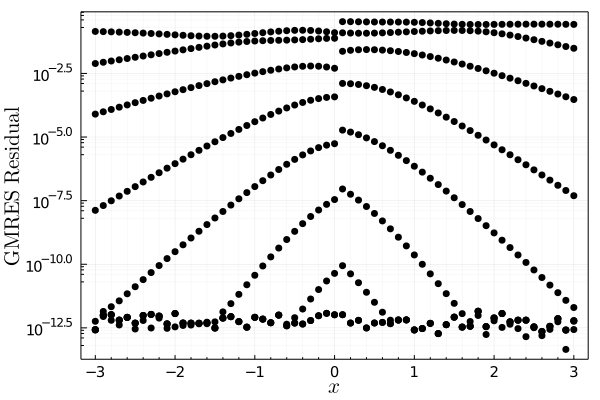

In [58]:
display(p)

In [59]:
xs = -20.0:1.0:20
x = xs[1]
out = x > 0.0 ? AKNS_inv(x)[3][2:2:end] : AKNS_inv2(x)[3][2:2:end] 
p = scatter(x*ones(length(out)),out,yaxis=:log,markercolor=:black,framestyle=:box,legend=false,ylabel=L"\mathrm{GMRES~Residual}",xlabel=L"x", minorgrid = true, tickfont = font(10),legendfontsize = 10,guidefontsize=14)
for x in xs[2:end]
    println(x)
       out = x > 0.0 ? AKNS_inv(x)[3][2:2:end] : AKNS_inv2(x)[3][2:2:end] 
    scatter!(x*ones(length(out)),out,yaxis=:log,markercolor=:black,framestyle=:box,legend=false,ylabel=L"\mathrm{GMRES~Residual}",xlabel=L"x", minorgrid = true, tickfont = font(10),legendfontsize = 10,guidefontsize=14)
end
    
    
# out = AKNS_inv(1.0)[3][2:2:end]

iteration = 2, residual = 3.763668142285502e-5
iteration = 3, residual = 3.346899026570157e-13
iteration = 4, residual = 3.300256392493013e-13
iteration = 5, residual = 3.3002572126215975e-13
iteration = 6, residual = 2.1319553527058992e-14
-19.0
iteration = 2, residual = 6.800711148793832e-5
iteration = 3, residual = 4.746442950998431e-13
iteration = 4, residual = 3.8792650922646206e-13
iteration = 5, residual = 3.8792641837500743e-13
iteration = 6, residual = 2.0754503250868997e-13
iteration = 7, residual = 2.0746375311126456e-13
iteration = 8, residual = 2.0746754865238785e-13
iteration = 9, residual = 7.951164297513026e-14
-18.0
iteration = 2, residual = 0.00012287350030782933
iteration = 3, residual = 1.4588417287365368e-12
iteration = 4, residual = 5.691110567985058e-13
iteration = 5, residual = 5.691111436295761e-13
iteration = 6, residual = 5.714257730260999e-14
-17.0
iteration = 2, residual = 0.00022196856109317576
iteration = 3, residual = 6.65233774914841e-12
iteration = 4, 

iteration = 3, residual = 0.12612562028899266
iteration = 4, residual = 0.0032265923274550517
iteration = 5, residual = 4.919198281317759e-6
iteration = 6, residual = 1.706537544023004e-9
iteration = 7, residual = 7.729335568398044e-13
iteration = 8, residual = 7.725662091498365e-13
iteration = 9, residual = 7.725662474393632e-13
iteration = 10, residual = 6.002081355865494e-13
GMRES did not terminate
3.0
iteration = 2, residual = 0.26751506593157265
iteration = 3, residual = 0.030785134759058218
iteration = 4, residual = 0.000298164325093436
iteration = 5, residual = 4.945108252686413e-8
iteration = 6, residual = 1.9939654098117006e-12
iteration = 7, residual = 6.056587975510953e-13
iteration = 8, residual = 6.056587350684405e-13
iteration = 9, residual = 5.758027089749238e-13
iteration = 10, residual = 2.7153675811825463e-13
GMRES did not terminate
4.0
iteration = 2, residual = 0.226123641505093
iteration = 3, residual = 0.006290109463814598
iteration = 4, residual = 2.35829105220198

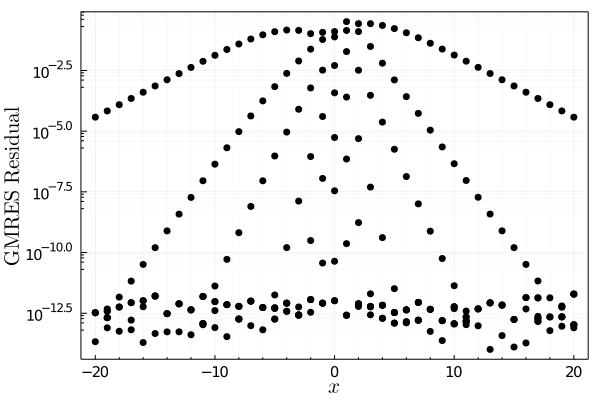

In [60]:
display(p)

## Explicit reflection (No solitions)

In [61]:
A = 1.55; γ = 2.0;
w = z -> -1im*z - A*γ*1im/2 + 0.5
T = sqrt(γ^2/4 -1 |> Complex)
wp = -1im*A*(T + γ/2)
wm = 1im*A*(T-γ/2)

q = x -> -1im*A*sech(x)*exp(-1im*γ*A*log(cosh(x)))
r = x -> -conj(q(x))

#269 (generic function with 1 method)

In [62]:
x = 1.0
logasech = z -> loggamma(w(z)) + loggamma(w(z)-wm-wp) - loggamma(w(z)-wp) - loggamma(w(z)-wm)
logbsech = z -> loggamma(w(z)) + loggamma(1-w(z)+wp+wm) - loggamma(wp) - loggamma(wm)
ρsechexplog = z -> 1im*1/A*2^(-1im*γ*A)*exp(logbsech(z) - logasech(z))
γsechexplog = z -> -conj(1im*1/A*2^(-1im*γ*A)*exp(logbsech(z) - conj(logasech(z))))
bsechexplog = z -> 1im*1/A*2^(-1im*γ*A)*exp(logbsech(z))
ρ1 = Fun(ρsechexplog,OscLaurent(2x,1.0),260)
ρ2 = Fun(x -> -conj(ρsechexplog(x)) ,OscLaurent(-2x,1.0),260)
aFun = Fun(zai(x -> exp(logasech(x)) - 1),OscLaurent(0.0),100)
AFun = Fun(zai(x -> conj(exp(logasech(x))) - 1),OscLaurent(0.0),100)
daFun = aFun'
CaFun = x -> 1 + Cauchy(+1,x)*aFun
dCaFun = x -> Cauchy(+1,x)*daFun
dAFun = AFun'
CAFun = x -> 1 + Cauchy(-1,x)*AFun
dCAFun = x -> Cauchy(-1,x)*dAFun

#293 (generic function with 1 method)

In [63]:
ρsechexplog(1.0)

4.9114442744563 - 2.7272876613436496im

In [ ]:
Sλ = AKNS.AKNSscattering(q,r,300,800,12.0)
eigs = AKNS.λ(Sλ)
eigsp = eigs[imag(eigs) .> 0]
eigsp |> display
eigsm = eigs[imag(eigs) .< 0]

In [ ]:
p = plot(abs.(ρ1.coefficients), yaxis = :log,framestyle=:box,minorgrid=:true,label=L"\rho_1~\mathrm{coefficients}",tickfont = font(10),legendfontsize = 10,guidefontsize=14)
plot!(abs.(ρ2.coefficients), yaxis = :log, label=L"\rho_2~\mathrm{coefficients}", xlabel = L"j",framestyle=:box,minorgrid=:true,tickfont = font(10),legendfontsize = 10,guidefontsize=14)
display(p)

In [64]:
𝓒⁺ = Cauchy(+1)
𝓒⁻ = Cauchy(-1)
u = x -> discreteRHP(eigsp,eigsm,(cp).*exp.(2im*eigsp*x),(cm).*exp.(-2im*eigsm*x))

function AKNS_inv(x)
    ρ1 = Fun(ρsechexplog,OscLaurent(2x,1.0),240)
    ρ2 = Fun(x -> -conj(ρsechexplog(x)) ,OscLaurent(-2x,1.0),240)
    Z = Fun(OscLaurent(0.0im,1.0),zeros(240)*0im)
    J2 = map(SumFun,[ρ1, 0*ρ2])
    J1 = map(SumFun,[0*ρ1, -ρ2])

    function Sop(x)
        out = copy(x)
        out[1] -= (𝓒⁺*x[2])*ρ1
        out[2] += (𝓒⁻*x[1])*ρ2
        return out
    end
    
    tol = 2e-12
    simp(f) = chop(combine!(chop(f,tol/10000)),tol/10000)
    out1 = GMRES(Sop,J1,⋅,tol,14,x -> simp(x))
#     out2 = GMRES(Sop,J2,⋅,tol,14,x -> simp(x))
#     (out1,out2)
end

function AKNS_inv2(x)
    ρ1 = Fun(γsechexplog,OscLaurent(-2x,1.0),240)
    ρ2 = Fun(x -> -conj(γsechexplog(x)) ,OscLaurent(2x,1.0),240)
    Z = Fun(OscLaurent(0.0im,1.0),zeros(240)*0im)
    J2 = map(SumFun,[ρ1, 0*ρ2])
    J1 = map(SumFun,[0*ρ1, -ρ2])

    function Sop(x)
        out = copy(x)
        out[1] -= (𝓒⁺*x[2])*ρ1
        out[2] += (𝓒⁻*x[1])*ρ2
        return out
    end
    
    tol = 2e-12
    simp(f) = chop(combine!(chop(f,tol/10000)),tol/10000)
    out1 = GMRES(Sop,J1,⋅,tol,14,x -> simp(x))
#     out2 = GMRES(Sop,J2,⋅,tol,14,x -> simp(x))
#     (out1,out2)
end

AKNS_inv2 (generic function with 1 method)

In [65]:
(out1,out2) = AKNS_inv(1.0);
sol1 = +([out1[2][i]*out1[1][i] for i=1:length(out1[2])]...)
u1 = -(sum(sol1)/pi)[2] 
sol2 = +([out2[2][i]*out2[1][i] for i=1:length(out2[2])]...)
u2 = (sum(sol2)/pi)[1]

iteration = 2, residual = 2.346729982363375
iteration = 3, residual = 0.07822289010449439
iteration = 4, residual = 0.00046310560010017095
iteration = 5, residual = 2.2053801102819879e-7
iteration = 6, residual = 1.553554608535147e-11
iteration = 7, residual = 3.3657969885134804e-12
iteration = 8, residual = 3.365799475442428e-12
iteration = 9, residual = 3.3658753633083016e-12
iteration = 10, residual = 2.4684297398605554e-12
iteration = 11, residual = 2.4683933213453263e-12
iteration = 12, residual = 2.4684271073970543e-12
iteration = 13, residual = 8.233288968577614e-13


LoadError: BoundsError

In [68]:
q(1.0)

-0.9789235549708715 - 0.22516000810732156im

In [66]:
(out1,out2) = AKNS_inv2(-1.0);
sol1 = +([out1[2][i]*out1[1][i] for i=1:length(out1[2])]...)
u1 = -(sum(sol1)/pi)[2]
sol2 = +([out2[2][i]*out2[1][i] for i=1:length(out2[2])]...)
u2 = (sum(sol2)/pi)[1]

iteration = 2, residual = 2.346729982363296
iteration = 3, residual = 0.07822289010441273
iteration = 4, residual = 0.0004631056001119255
iteration = 5, residual = 2.2053801055518809e-7
iteration = 6, residual = 1.743366755357368e-11
iteration = 7, residual = 8.596993565696674e-12
iteration = 8, residual = 8.597033968306471e-12
iteration = 9, residual = 8.596976176638887e-12
iteration = 10, residual = 6.554190787517013e-12
iteration = 11, residual = 6.553891860393731e-12
iteration = 12, residual = 6.553922468547188e-12
iteration = 13, residual = 6.223334762635359e-12
iteration = 14, residual = 6.223246339918037e-12
GMRES did not terminate


LoadError: BoundsError

In [67]:
q(-1.0)

-0.9789235549708715 - 0.22516000810732156im

In [69]:
xs = -3.0:.1:3
x = xs[1]
out = x > 0.0 ? AKNS_inv(x)[3][2:2:end] : AKNS_inv2(x)[3][2:2:end] 
p = scatter(x*ones(length(out)),out,yaxis=:log,markercolor=:black,framestyle=:box,legend=false,ylabel=L"\mathrm{GMRES~Residual}",xlabel=L"x", minorgrid = true, tickfont = font(10),legendfontsize = 10,guidefontsize=14)
for x in xs[2:end]
    println(x)
       out = x > 0.0 ? AKNS_inv(x)[3][2:2:end] : AKNS_inv2(x)[3][2:2:end] 
    scatter!(x*ones(length(out)),out,yaxis=:log,markercolor=:black,framestyle=:box,legend=false,ylabel=L"\mathrm{GMRES~Residual}",xlabel=L"x", minorgrid = true, tickfont = font(10),legendfontsize = 10,guidefontsize=14)
end
    
    
# out = AKNS_inv(1.0)[3][2:2:end]

iteration = 2, residual = 0.040563296887147604
iteration = 3, residual = 5.007969454544927e-6
iteration = 4, residual = 7.76391874712662e-11
iteration = 5, residual = 6.7203763401214985e-12
iteration = 6, residual = 6.720364363689485e-12
iteration = 7, residual = 6.5771484688479315e-12
iteration = 8, residual = 7.36155554094948e-13
-2.9
iteration = 2, residual = 0.04956907729481952
iteration = 3, residual = 8.243216621418381e-6
iteration = 4, residual = 1.7197889347444602e-10
iteration = 5, residual = 6.757041625977814e-12
iteration = 6, residual = 6.757017500589436e-12
iteration = 7, residual = 6.751169807630408e-12
iteration = 8, residual = 2.6068840486430956e-12
iteration = 9, residual = 2.606465256627434e-12
iteration = 10, residual = 1.6208368707971547e-12
-2.8
iteration = 2, residual = 0.060580877943492976
iteration = 3, residual = 1.3563615937972396e-5
iteration = 4, residual = 3.8171201760502165e-10
iteration = 5, residual = 6.804556165749745e-12
iteration = 6, residual = 6.804

iteration = 7, residual = 6.809461233297247e-12
iteration = 8, residual = 6.809564110418839e-12
iteration = 9, residual = 3.5707089475738567e-12
iteration = 10, residual = 2.9398196519857954e-12
iteration = 11, residual = 2.9399559761139324e-12
iteration = 12, residual = 2.91835589119148e-12
iteration = 13, residual = 2.903856523399001e-12
iteration = 14, residual = 2.9038243095883365e-12
GMRES did not terminate
-1.1
iteration = 2, residual = 1.9189629805133137
iteration = 3, residual = 0.05022806821349047
iteration = 4, residual = 0.00022318855911005123
iteration = 5, residual = 6.643023744500561e-8
iteration = 6, residual = 8.241201452931524e-12
iteration = 7, residual = 7.739459533822632e-12
iteration = 8, residual = 7.739404205437156e-12
iteration = 9, residual = 7.487428898791262e-12
iteration = 10, residual = 3.5839602973622234e-12
iteration = 11, residual = 3.5838993202888923e-12
iteration = 12, residual = 3.58224796071742e-12
iteration = 13, residual = 1.2940950621091294e-12
-1

iteration = 10, residual = 1.1179709447194401e-11
iteration = 11, residual = 1.1179661170168318e-11
iteration = 12, residual = 1.0515248188783827e-11
iteration = 13, residual = 1.0511889274326693e-11
iteration = 14, residual = 1.0511943732908953e-11
GMRES did not terminate
0.2
iteration = 2, residual = 7.605787259461649
iteration = 3, residual = 1.6895991310207055
iteration = 4, residual = 0.07780217018947477
iteration = 5, residual = 0.0011667003857122916
iteration = 6, residual = 2.916320636369931e-6
iteration = 7, residual = 1.6486482444192266e-9
iteration = 8, residual = 1.3051036164013028e-11
iteration = 9, residual = 1.3050224310401707e-11
iteration = 10, residual = 1.3050251372761113e-11
iteration = 11, residual = 1.301794032020183e-11
iteration = 12, residual = 1.274619128022016e-11
iteration = 13, residual = 1.2746175817737194e-11
iteration = 14, residual = 1.274452037904975e-11
GMRES did not terminate
0.3
iteration = 2, residual = 6.995399182682144
iteration = 3, residual = 1

iteration = 11, residual = 3.3097889932365105e-12
iteration = 12, residual = 2.9969222472987825e-13
1.6
iteration = 2, residual = 0.6872650714960634
iteration = 3, residual = 0.0049241527312655865
iteration = 4, residual = 5.0279577095069685e-6
iteration = 5, residual = 1.343572072096785e-10
iteration = 6, residual = 3.5441117367362422e-12
iteration = 7, residual = 3.5441203816105793e-12
iteration = 8, residual = 3.544220828534978e-12
iteration = 9, residual = 6.944302724784445e-13
1.7
iteration = 2, residual = 0.559921540810809
iteration = 3, residual = 0.0030478529546330443
iteration = 4, residual = 2.3105402692709443e-6
iteration = 5, residual = 3.800491501029156e-11
iteration = 6, residual = 3.922133648618994e-12
iteration = 7, residual = 3.922144501383071e-12
iteration = 8, residual = 3.92117605567708e-12
iteration = 9, residual = 7.381915949100159e-13
1.8
iteration = 2, residual = 0.4564437941068988
iteration = 3, residual = 0.0018800649755033984
iteration = 4, residual = 1.05756

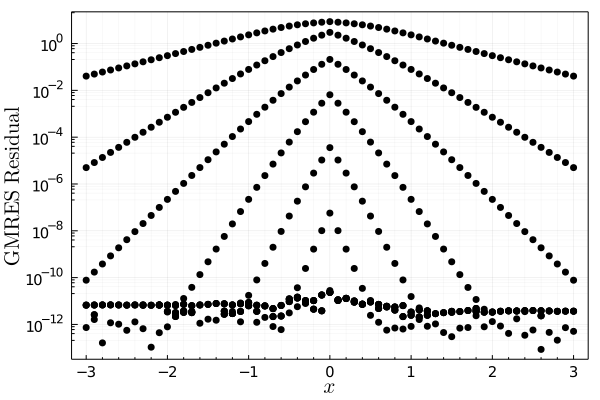

In [70]:
display(p)

In [71]:
xs = -30.0:1.0:30
x = xs[1]
out = x > 0.0 ? AKNS_inv(x)[3][2:2:end] : AKNS_inv2(x)[3][2:2:end] 
p = scatter(x*ones(length(out)),out,yaxis=:log,markercolor=:black,framestyle=:box,legend=false,ylabel=L"\mathrm{GMRES~Residual}",xlabel=L"x", minorgrid = true, tickfont = font(10),legendfontsize = 10,guidefontsize=14)
for x in xs[2:end]
    println(x)
    out = x > 0.0 ? AKNS_inv(x)[3][2:2:end] : AKNS_inv2(x)[3][2:2:end] 
    scatter!(x*ones(length(out)),out,yaxis=:log,markercolor=:black,framestyle=:box,legend=false,ylabel=L"\mathrm{GMRES~Residual}",xlabel=L"x", minorgrid = true, tickfont = font(10),legendfontsize = 10,guidefontsize=14)
end

iteration = 2, residual = 6.768364088780479e-12
iteration = 3, residual = 6.768365718438024e-12
iteration = 4, residual = 2.452609435478759e-12
iteration = 5, residual = 2.4515503071127736e-12
iteration = 6, residual = 2.4510987354327803e-12
iteration = 7, residual = 1.8090551304671806e-12
-29.0
iteration = 2, residual = 6.768364088848815e-12
iteration = 3, residual = 6.768370331606942e-12
iteration = 4, residual = 3.118556571371419e-12
iteration = 5, residual = 3.0984896272144694e-12
iteration = 6, residual = 3.098193467444078e-12
iteration = 7, residual = 1.8157954731071383e-12
-28.0
iteration = 2, residual = 6.76838097328201e-12
iteration = 3, residual = 6.76839915049842e-12
iteration = 4, residual = 4.703357389271612e-12
iteration = 5, residual = 4.703230542049212e-12
iteration = 6, residual = 4.702752969669497e-12
iteration = 7, residual = 2.164440073194505e-12
iteration = 8, residual = 2.16443365996389e-12
iteration = 9, residual = 2.455696880143281e-13
-27.0
iteration = 2, resid

iteration = 4, residual = 0.00046310560010017095
iteration = 5, residual = 2.2053801102819879e-7
iteration = 6, residual = 1.553554608535147e-11
iteration = 7, residual = 3.3657969885134804e-12
iteration = 8, residual = 3.365799475442428e-12
iteration = 9, residual = 3.3658753633083016e-12
iteration = 10, residual = 2.4684297398605554e-12
iteration = 11, residual = 2.4683933213453263e-12
iteration = 12, residual = 2.4684271073970543e-12
iteration = 13, residual = 8.233288968577614e-13
2.0
iteration = 2, residual = 0.30384481691715237
iteration = 3, residual = 0.0007095550307900935
iteration = 4, residual = 2.1951331212847455e-7
iteration = 5, residual = 3.4402754251401156e-12
iteration = 6, residual = 3.3415899816718143e-12
iteration = 7, residual = 3.3415081423918683e-12
iteration = 8, residual = 3.341482243281437e-12
iteration = 9, residual = 1.3227157012049943e-12
3.0
iteration = 2, residual = 0.04056329688716087
iteration = 3, residual = 5.007969455882964e-6
iteration = 4, residual

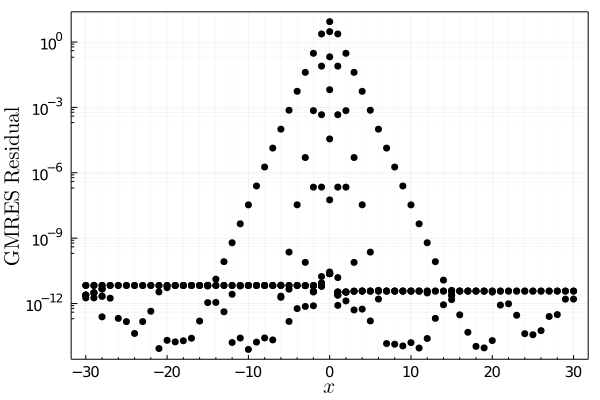

In [72]:
display(p)